## Metrics analysis notebook

In [1]:
# general imports
import numpy as np
import pandas as pd
from os import path
from datetime import datetime

# helper functions
from hach.cleaning import *
from hach.metrics import *
from hach.plot_metrics import *

# plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Loading the climate dataframes pickles for each year into a dictionary**

In [2]:
climate_dfs = {}
for i in range(2017, 2021):
    climate_dfs[i] = pd.read_pickle('data/climate_df_{}.pkl'.format(i))

**Wiki data**

In [3]:
# load the labels for wiki data
wiki_labels = pd.read_csv('data/wikidata_labels_descriptions_quotebank.csv.bz2', compression='bz2', index_col='QID')

#### Load the wiki speakers pickle

In [4]:
wiki_speakers = pd.read_pickle('data/wiki_speakers.pkl')
wiki_speakers.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
Q23762578,None,[+1947-12-20T00:00:00Z],"[Q902, Q843]",[Q6581097],1319692653,None,None,[Q82955],[Q1361491],None,Q23762578,Anisul Islam Mahmud,None,item,[Q432]
Q18199405,None,[+1963-08-13T00:00:00Z],[Q34],[Q6581097],1280534852,None,None,[Q1281618],None,None,Q18199405,Anders Jansson,None,item,None
Q5415483,None,[+1981-11-01T00:00:00Z],[Q30],[Q6581097],1378227353,None,None,"[Q19204627, Q15295720]",None,None,Q5415483,Evan Mathis,None,item,None
Q4911497,"[Warren Wilhelm, Jr., Bill deBlasio, Warren Wi...",[+1961-05-08T00:00:00Z],[Q30],[Q6581097],1393528151,None,None,"[Q82955, Q40348]",[Q29552],None,Q4911497,Bill de Blasio,None,item,None
Q3061333,[Evan Lee Scribner],[+1985-07-19T00:00:00Z],[Q30],[Q6581097],1377322587,None,None,[Q10871364],None,None,Q3061333,Evan Scribner,None,item,None


**Cleaning**

In [5]:
wiki_speakers = wiki_speakers.drop_duplicates('id')


In [6]:
# cleaning
for i in range(2017, 2021):
    climate_dfs[i] = clean_df(climate_dfs[i])

**Top speakers barplots**

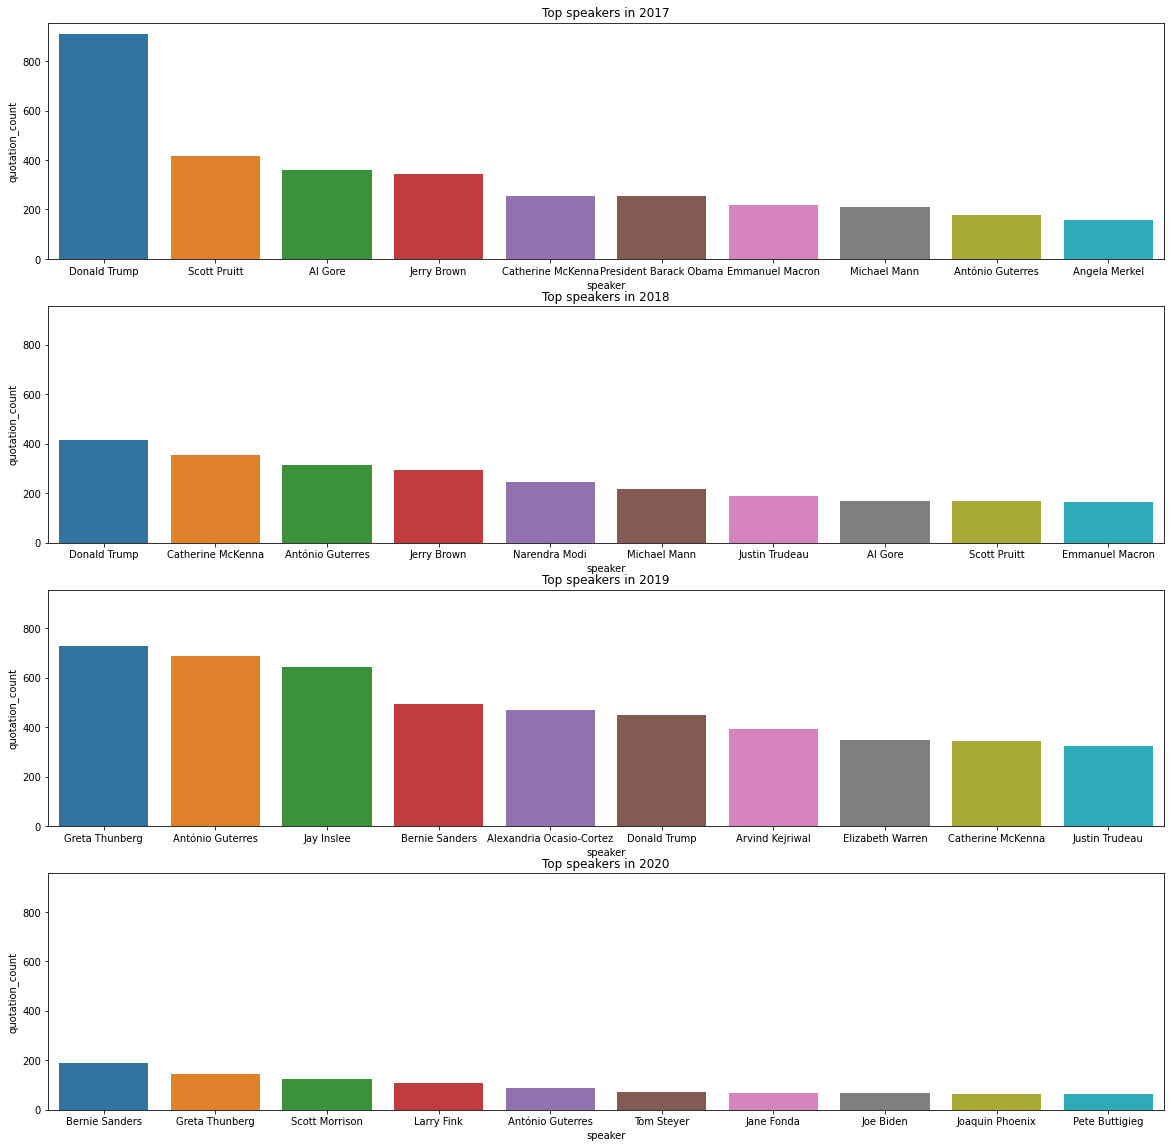

In [7]:
plot_top_speakers(climate_dfs, 10)

In [8]:
# show top quotations from 2017
top_quotations(climate_dfs[2017], 10)

,speaker,quotation,numOccurrences
0,Jason Kessler,This is about an anti-white climate within the...,1579
1,Elon Musk,Climate change is real. Leaving Paris is not g...,1157
2,António Guterres,Climate change is undeniable. Climate Change i...,1017
3,Paolo Gentiloni,a cornerstone in the co-operation between our ...,843
4,Donald Trump,could use a little bit of that good old #Globa...,833
5,Angela Merkel,will combine our forces more resolutely than e...,762
6,Mario Rodriguez,The battle against climate change is irreversi...,717
7,Donald Trump,Perhaps we could use a little bit of that good...,677
8,Donald Trump,"In the East, it could be the COLDEST New Year'...",654
9,Cara Mund,There is evidence that climate change is exist...,596


### Metrics of speakers

**Load the speakers pickles**

In [9]:
speakers = {}
for i in range(2017, 2021):
    speakers[i] = pd.read_pickle('data/speakers_{}.pkl'.format(i))
    # clean the speakers to consider only those below the age of 90 (arbitrary choice to make things simpler)
    speakers[i] = speakers[i][speakers[i].age < 90]

In [10]:
speakers[2018]

,speaker,quotation_count,gender,age,nationality,political_party,occupation
0,Donald Trump,415,male,75.0,United States of America,Republican Party,business magnate
1,Catherine McKenna,356,female,50.0,Canada,Liberal Party of Canada,lawyer
2,António Guterres,314,male,72.0,Portugal,Socialist Party,politician
3,Jerry Brown,293,male,83.0,United States of America,Democratic Party,lawyer
4,Narendra Modi,243,male,71.0,India,Bharatiya Janata Party,politician
...,...,...,...,...,...,...,...
18351,Jeff Ward,1,male,35.0,United States of America,None,actor
18352,Jeff Williams,1,male,71.0,United States of America,None,drummer
18353,Jeff Wilson,1,male,48.0,United States of America,None,scientist
18354,Jeff Wood,1,male,67.0,United Kingdom,None,association football player


**Gender**

Lets see the proportion of men and women talking about climate between 2017 and 2020.

We choose to only compare men and women and not consider the other genders present in the speakers dataset. We made this choice after checking that the other genders (transgender, non-binary, genderqueer, etc.) represent only a tiny percent of all speakers in our datasets.

In [11]:
# example: all the genders in the 2017 speakers dataset
all_genders_2017 = speakers[2017][~speakers[2017].gender.isna()].gender.unique().tolist()
print('All the genders for the speakers dataset in 2017 are: {}'.format(all_genders_2017))
non_binary_percent = speakers[2017][speakers[2017].gender == 'non-binary'].shape[0] / speakers[2017].shape[0]
print('Percentage of non-binary people within the 2017 speakers = {:.2%}'.format(non_binary_percent))

All the genders for the speakers dataset in 2017 are: ['male', 'female', 'transgender female', 'genderfluid', 'non-binary', 'cisgender female', 'transgender male', 'genderqueer']
Percentage of non-binary people within the 2017 speakers = 0.09%


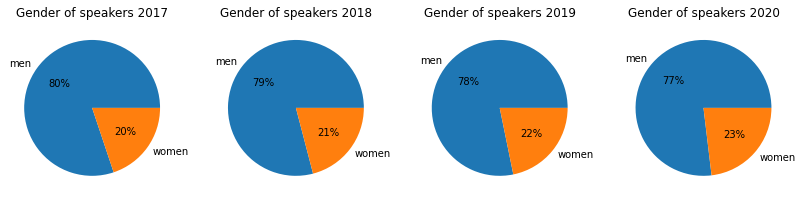

In [12]:
plot_gender(speakers)

As we can observe the proportion of men and women talking about climate related topics remain almost constant during this four year period of time. In fact, one can notice a very small increase by 1% each year in the ratio of women within the climate speakers. Therefore, the difference in the percentage women represent between 2017 and 2020 is 3% and suggests that this tendency could continue later on.

**Age**

We would also like to compare the distribution of age of the speakers during the years of our interest and see if it somehow changes around 2018 when Greta Thunberg gain in popularity and start inspiring younger people to talk about climate.

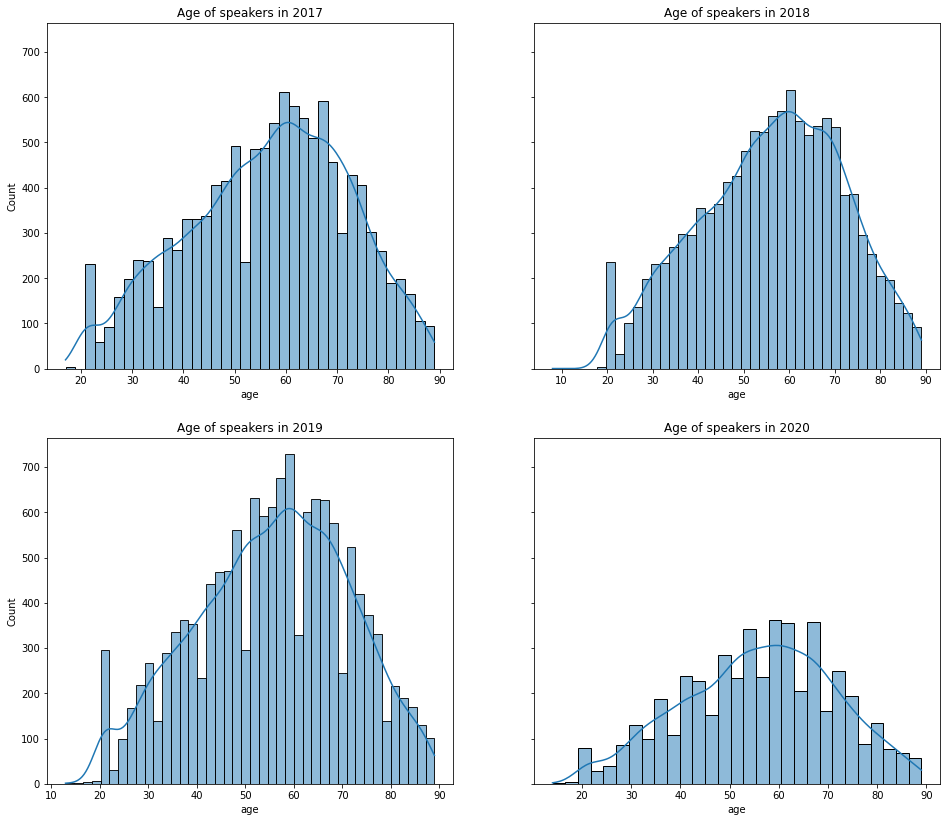

In [13]:
plot_age(speakers)

**Nationality**

Plot pie charts

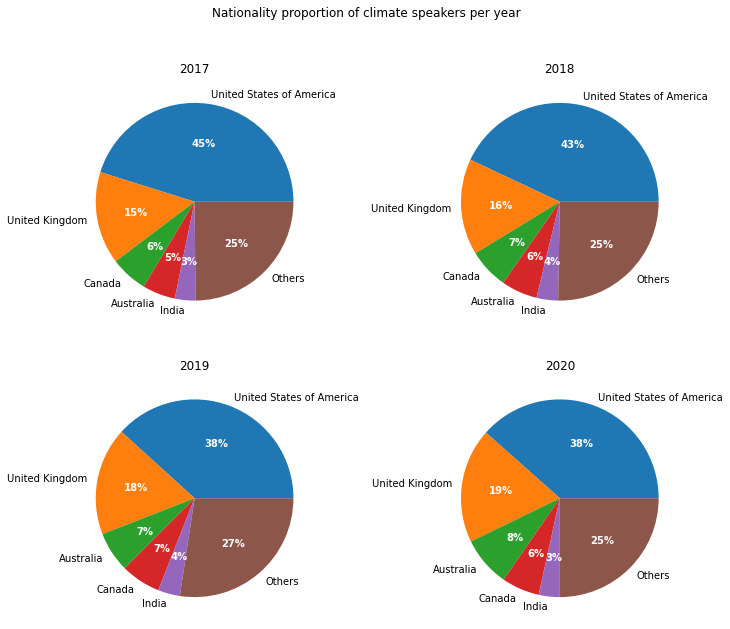

In [14]:
plot_nationality_charts(speakers)

**Political party**


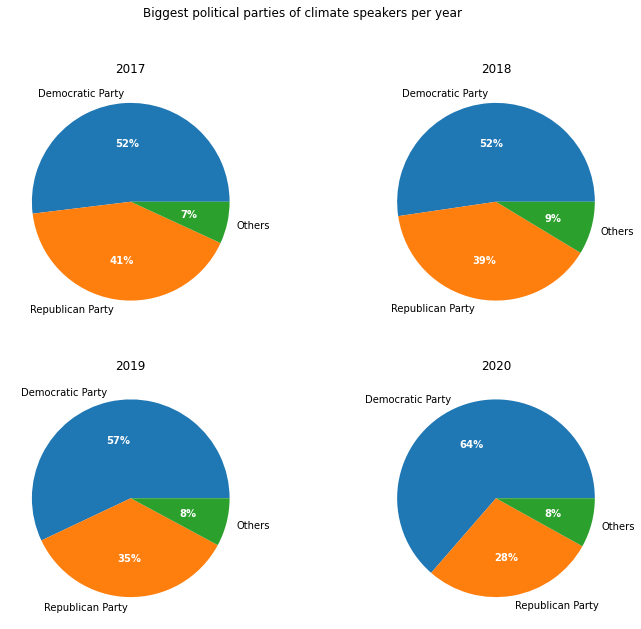

In [15]:
plot_party(speakers, 'United States of America')

#### Get quotes

As we have now speaker dfs, we can easily get all the quotes per year of a speaker using __*get_quotes*__ in *metrics.py*

*Idea: go through all speakers in a year and get their quotes ... then do whatever you want with that*

In [16]:
get_quotes('Donald Trump', climate_dfs[2018])

,quotation,numOccurrences
0,Brutal and Extended Cold Blast could shatter A...,402
1,"There is a cooling, and there's a heating. I m...",287
2,"I'm not denying climate change,",285
3,Brutal and Extended Cold Blast could shatter A...,229
4,unhealthy days for ozone and fine particle pol...,164
...,...,...
410,"climate change, racism,",1
411,"Honey, can you take out the trash? Just put it...",1
412,we could use some good old global warming,1
413,promoting a political climate that celebrates ...,1


### Age x complexity

Load the speakers with its complexity and sentiment scores

In [17]:
dfs_speakers = {}
dfs = {}
dfs_mean = {}
for i in range(2017, 2021): 
    dfs[i] = pd.read_pickle('data/climate_df_complexity'+ str(i) +'.pkl')
    dfs[i] = dfs[i].drop(['quoteID', 'qids', 'numOccurrences', 'date', 'probas', 'urls', 'phase'], axis=1)
    dfs_mean[i] = dfs[i].groupby('speaker').mean().reset_index(drop=False)
    dfs_speakers[i] = dfs_mean[i].merge(speakers[i], left_on='speaker', right_on='speaker')
    dfs_speakers[i] = dfs_speakers[i].reset_index(drop=True)

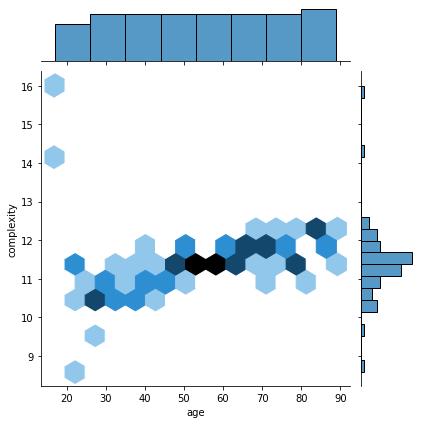

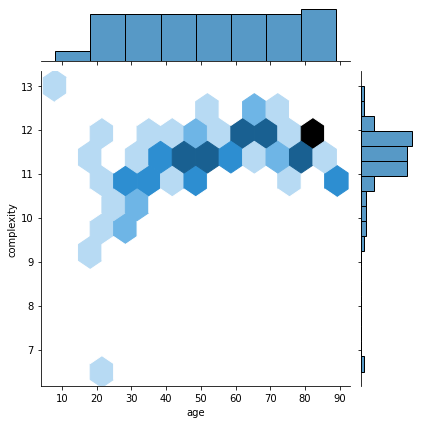

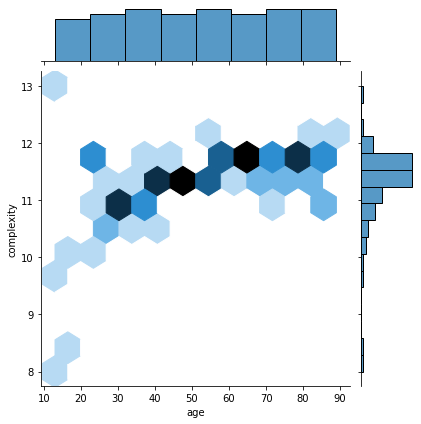

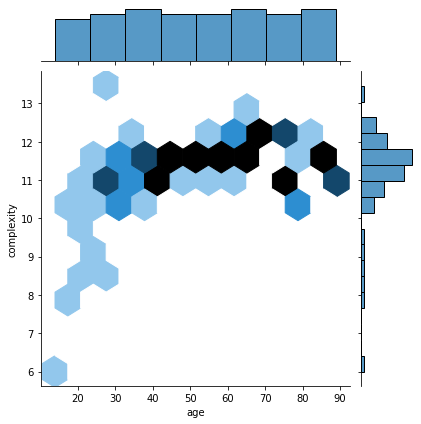

In [18]:
plot_age_complexity(dfs_speakers)

### Age x sentiment

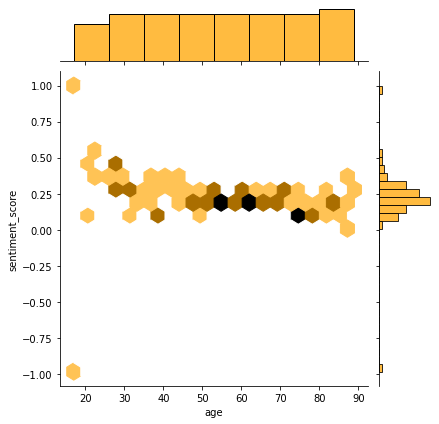

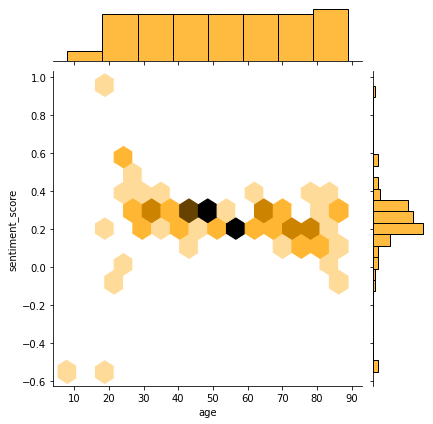

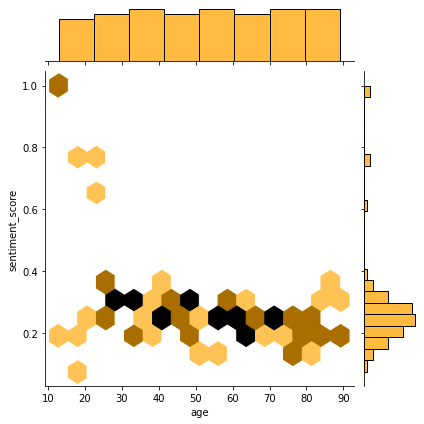

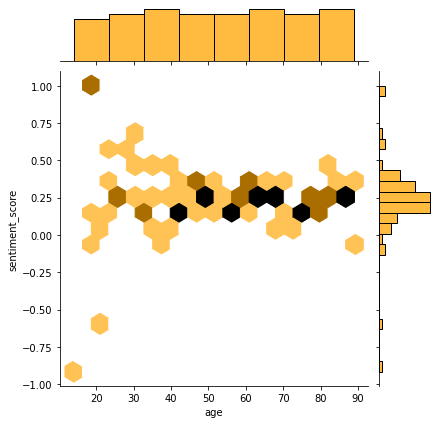

In [19]:
plot_age_sentiment(dfs_speakers)

### Gender x complexity x sentiment

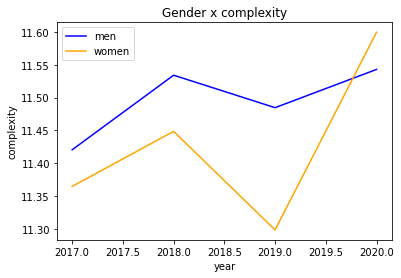

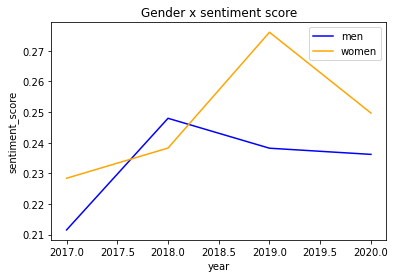

In [20]:
plot_gender_speach(dfs_speakers)